<a href="https://colab.research.google.com/github/sonaljain2212/Healthcare-Entity-and-Relationship-Extraction-/blob/main/Topic_modeling_UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import os
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/NER/bq-results-20210408-184921-9m8dp4ue6rmo.csv")

print(df.head())
count = 0
for index , row in df.iterrows():
    count += 1
    print(count)
  
    filename = str(row[1])
    myfile = open('/content/drive/MyDrive/NER/ehrs/'+filename+'.txt', 'w')
    myfile.write(row[2])
    myfile.close()

Streaming output truncated to the last 5000 lines.
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
54681
54682
54683
54684
54685
54686
54687
54688
54689
54690
54691
54692
54693
54694
54695
54696
54697
54698
54699
54700
54701
54702
54703
54704
54705
54706
54707
54708
54709
54710
54711
54712
54713
54714
54715
54716
54717
54718
54719
54720
54721
54722
54723
54724
54725
54726
54727
54728
54729
54730
54731
54732
54733
54734
54735
54736
54737
54738
54739
54740
54741
54742
54743
54744
54745
54746
54747
54748
54749
54750
54751
54752
54753
54754
54755
54756
54757
54758
54759
54760
54761
54762
54763
54764
54765
54766
54767
54768
54769
54770
54771
54772
54773
54774
54775
54776
54777
54778
54779
54780
54781
54782
54783
54784
54785
54786
54787
54788
54789
54790
54791
54792
54793
54794
54795
54796
54797
54798
54799
54800
54801
54802
54803
54804
54805
54806
54807
54808
54809
54810
5

In [ ]:
entries = os.listdir('/content/drive/MyDrive/NER/ehrs') 

In [ ]:
# remove urls, handles, and the hashtag from hashtags (taken from https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression)
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text
# make all text lowercase
def text_lowercase(text):
    return text.lower()
    
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
  
    text = remove_urls(text)

    text = remove_numbers(text)
    text = remove_punctuation(text)
  
    text = tokenize(text)
 
    text = remove_stopwords(text)
 
    text = lemmatize(text)
    
    text = ' '.join(text)
   
    return text

In [ ]:
count =0
documents = []
for entry in entries:
  count += 1
  # print(count)
  f = open('/content/drive/MyDrive/NER/ehrs/'+entry, "r")
  text = f.readlines()
  text = " ".join(str(x) for x in text)  
  documents.append(preprocessing(text))

In [ ]:
import pickle
with open('/content/drive/MyDrive/NER/documents.pkl', 'wb') as f:
   pickle.dump(documents, f)

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['patient','time','blood','give','hospital', 'admission', 'tablet','discharge', 'history', 'leave', 'name', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
# data = df.content.values.tolist()
data_words = list(sent_to_words(documents))

# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
data_ready = process_words(data_words) 

In [ ]:
import pickle
with open('data_ready.pkl', 'wb') as f:
   pickle.dump(data_ready, f)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]


In [ ]:
import pickle
with open('id2word.pkl', 'wb') as f:
   pickle.dump(id2word, f)

In [ ]:
import pickle
with open('corpus.pkl', 'wb') as f:
   pickle.dump(corpus, f)

In [ ]:
import pandas as pd

documents = pd.read_pickle(r'/content/documents.pkl')
id2word = pd.read_pickle(r'/content/id2word.pkl')
corpus = pd.read_pickle(r'/content/corpus.pkl')
lda_model = pd.read_pickle(r'/content/lda_model.pkl')
data_ready = pd.read_pickle(r'/content/data_ready.pkl')

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=50,
                                           per_word_topics=True)

print(lda_model.print_topics())

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.026*"infant" + 0.024*"normal" + 0.023*"life" + 0.020*"week" + '
  '0.016*"receive" + 0.016*"day" + 0.015*"age" + 0.015*"negative" + '
  '0.015*"month" + 0.013*"feed"'),
 (1,
  '0.013*"last" + 0.013*"day" + 0.010*"pm" + 0.010*"present" + 0.009*"start" + '
  '0.008*"pt" + 0.008*"pain" + 0.008*"medication" + 0.008*"follow" + '
  '0.008*"deny"'),
 (2,
  '0.021*"small" + 0.016*"abdominal" + 0.015*"fluid" + 0.011*"large" + '
  '0.011*"tube" + 0.009*"note" + 0.008*"liver" + 0.008*"evidence" + '
  '0.008*"cancer" + 0.007*"pleural"'),
 (3,
  '0.047*"valve" + 0.042*"aortic" + 0.041*"normal" + 0.031*"mitral" + '
  '0.025*"ventricular" + 0.021*"regurgitation" + 0.016*"leaflet" + '
  '0.014*"mild" + 0.013*"effusion" + 0.013*"last"'),
 (4,
  '0.021*"fracture" + 0.010*"follow" + 0.008*"neck" + 0.008*"fall" + '
  '0.008*"extremity" + 0.008*"injury" + 0.007*"soft" + 0.007*"place" + '
  '0.007*"multiple" + 0.007*"leg"'),
 (5,
  '0.030*"artery" + 0.023*"heart" + 0.019*"coronary" + 0.018*"cardia

In [ ]:
import pickle
# with open('lda_model20.pkl', 'wb') as f:
#    pickle.dump(lda_model, f)

In [ ]:
# Compute Coherence Score
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           iterations=10,
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=50, step=3)

In [ ]:
ldamodel8 = model_list[2]
with open('ldamodel8.pkl', 'wb') as f:
   pickle.dump(ldamodel8, f)

In [ ]:
ldamodel12 = model_list[12]
with open('ldamodel12.pkl', 'wb') as f:
   pickle.dump(ldamodel12, f)

range(2, 50, 3)


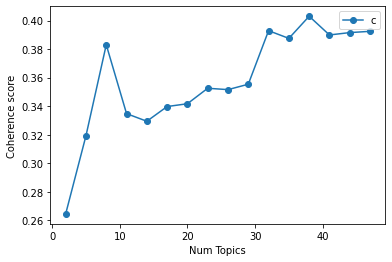

In [ ]:
# Show graph
limit=50; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values,"-o")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2645
Num Topics = 5  has Coherence Value of 0.3192
Num Topics = 8  has Coherence Value of 0.3831
Num Topics = 11  has Coherence Value of 0.3348
Num Topics = 14  has Coherence Value of 0.3294
Num Topics = 17  has Coherence Value of 0.3398
Num Topics = 20  has Coherence Value of 0.3417
Num Topics = 23  has Coherence Value of 0.3526
Num Topics = 26  has Coherence Value of 0.3516
Num Topics = 29  has Coherence Value of 0.3554
Num Topics = 32  has Coherence Value of 0.3929
Num Topics = 35  has Coherence Value of 0.3875
Num Topics = 38  has Coherence Value of 0.403
Num Topics = 41  has Coherence Value of 0.3899
Num Topics = 44  has Coherence Value of 0.3916
Num Topics = 47  has Coherence Value of 0.3925


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts= documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel8, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [date, service, respiratory, distress, present...
1            1  ...  [medicine, allergy, demerol, attend, first, tr...
2            2  ...  [ccu, present, illness, age, year, old, female...
3            3  ...  [medicine, allergy, clindamycin, attend, last,...
4            4  ...  [date, present, year, old, medical, significan...
5            5  ...  [date, intensive, care, unit, medical, firm, i...
6            6  ...  [date, medicine, allergy, hydralazine, attend,...
7            7  ...  [date, allergy, record, allergy, drug, attend,...
8            8  ...  [date, allergy, magnevist, attend, first, name...
9            9  ...  [date, neurosurgery, allergy, attend, first, m...

[10 rows x 5 columns]

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  ...                                                                                  Representative Text
0        0.0  ...  [date, allergy, ambisome, attend, first, respiratory, distress, major, surgical, invasive, proce...
1        1.0  ...  [date, service, medicine, allergy, record, allergy, drug, attend, first, major, surgical, invasi...
2        2.0  ...  [date, service, medicine, allergy, allergy, attend, first, tachycardia, major, surgical, invasiv...
3        3.0  ...  [date, allergy, record, allergy, drug, attend, first, lf, asymptomatic, major, surgical, invasiv...
4        4.0  ...  [unit, date, present, illness, twin, bear, year, old, mother, type, positive, antibody, negative...
5        5.0  ...  [date, present, year, old, vessel, coronary, artery, disease, preserve, ventricular, function, m...
6        6.0  ...  [lastname, unit, neurosurgery, allergy, penicillin, attend, first, amend, area, follow, instruct...
7        7.0  ...  [date, service, surgery, allergy, drug, allergy, first, fall, major, surgical, invasive, procedu...

[8 rows x 4 columns]

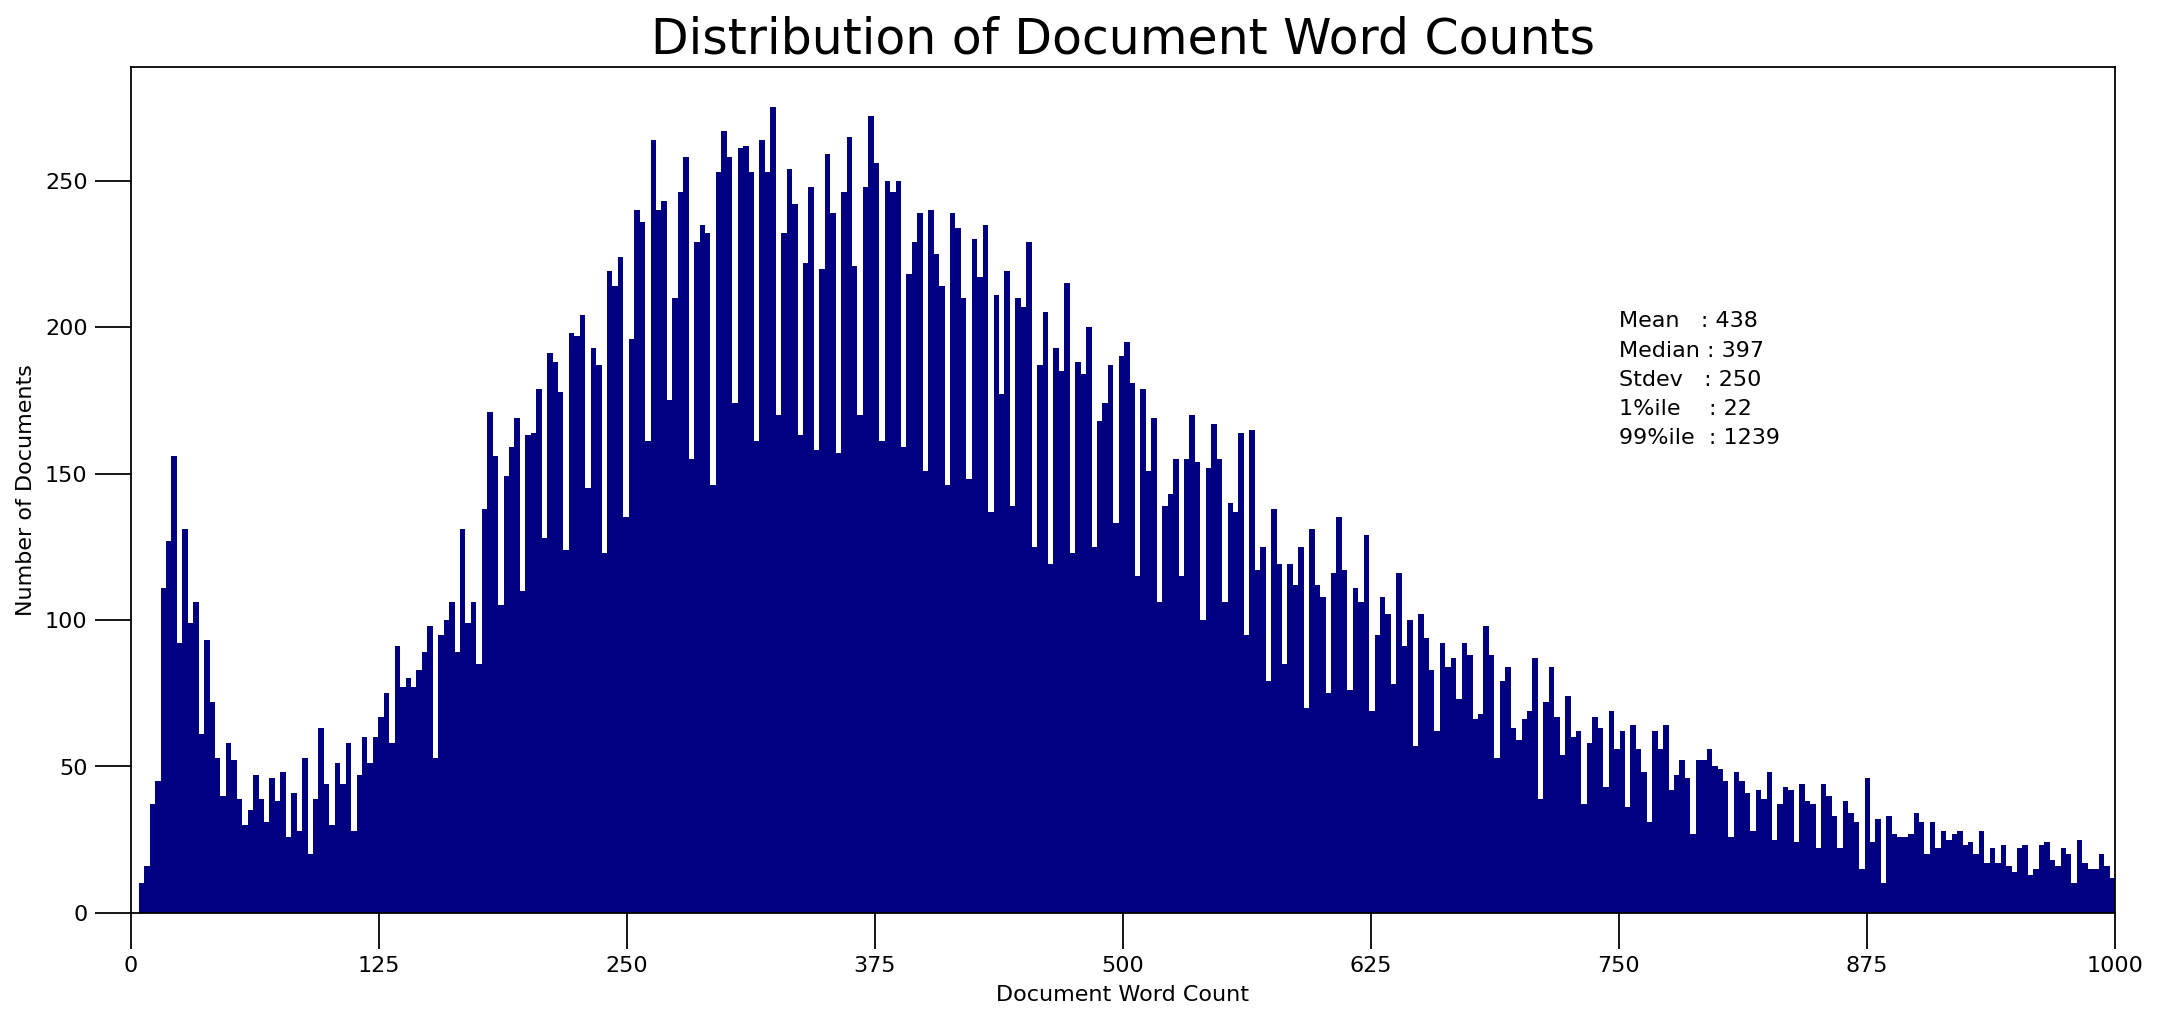

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 200, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 190, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  180, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  170, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  160, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

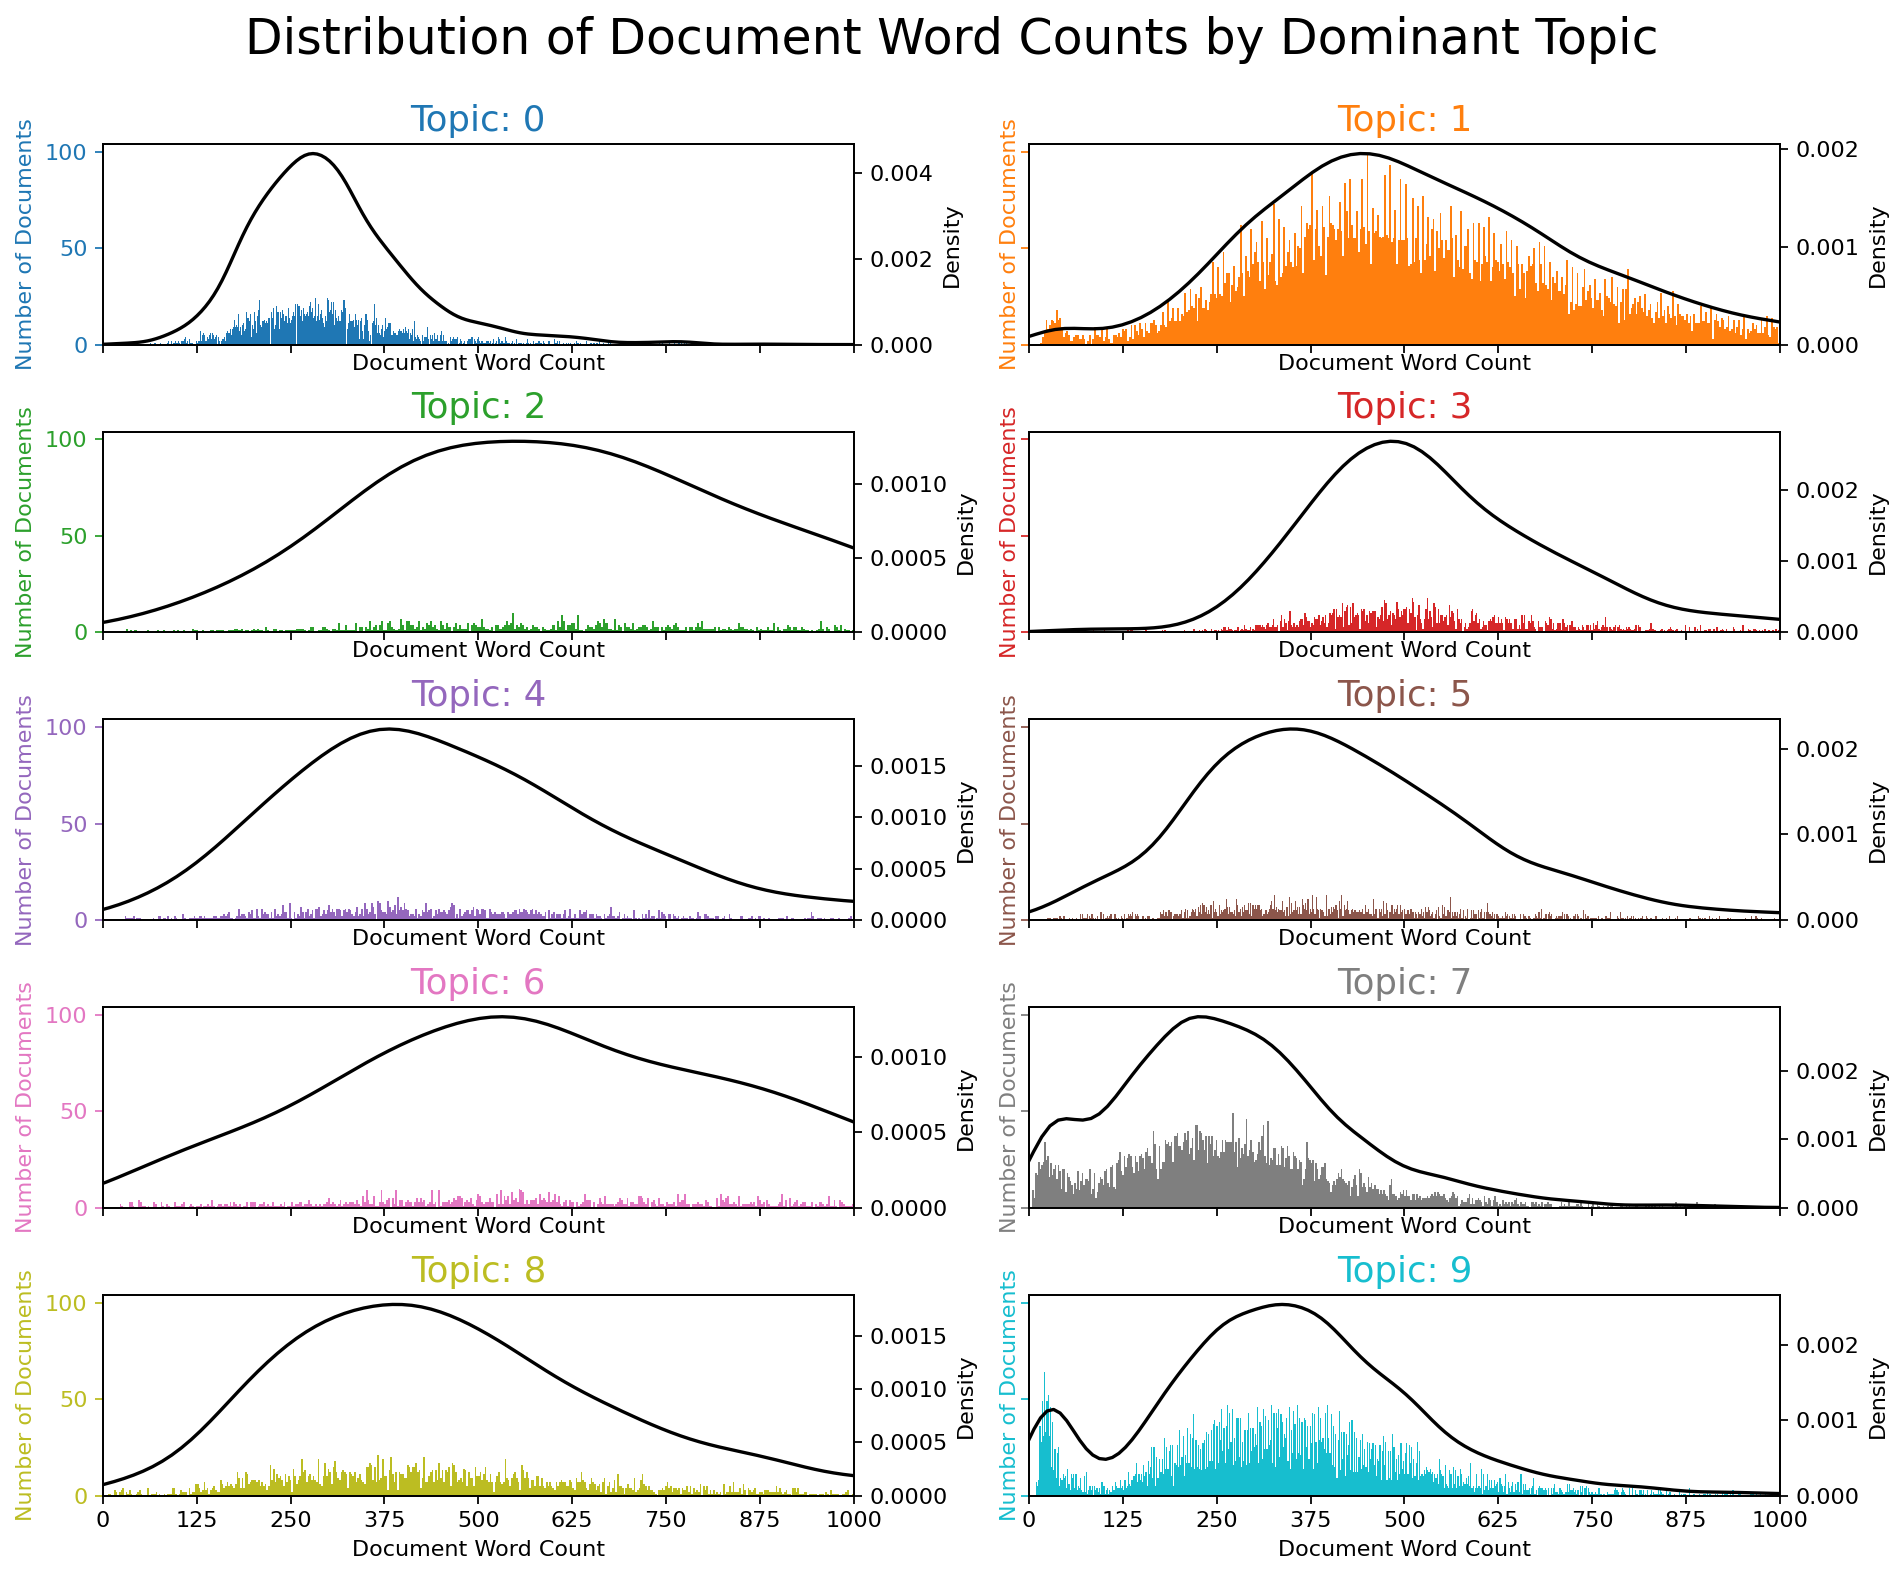

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(12,10), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

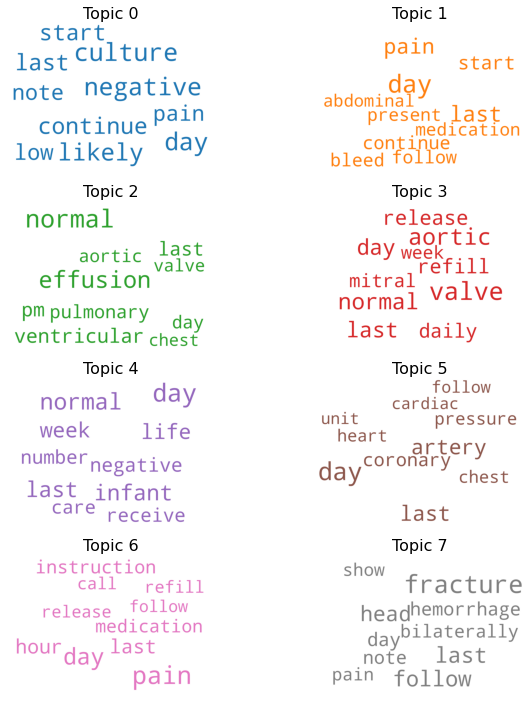

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel8.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

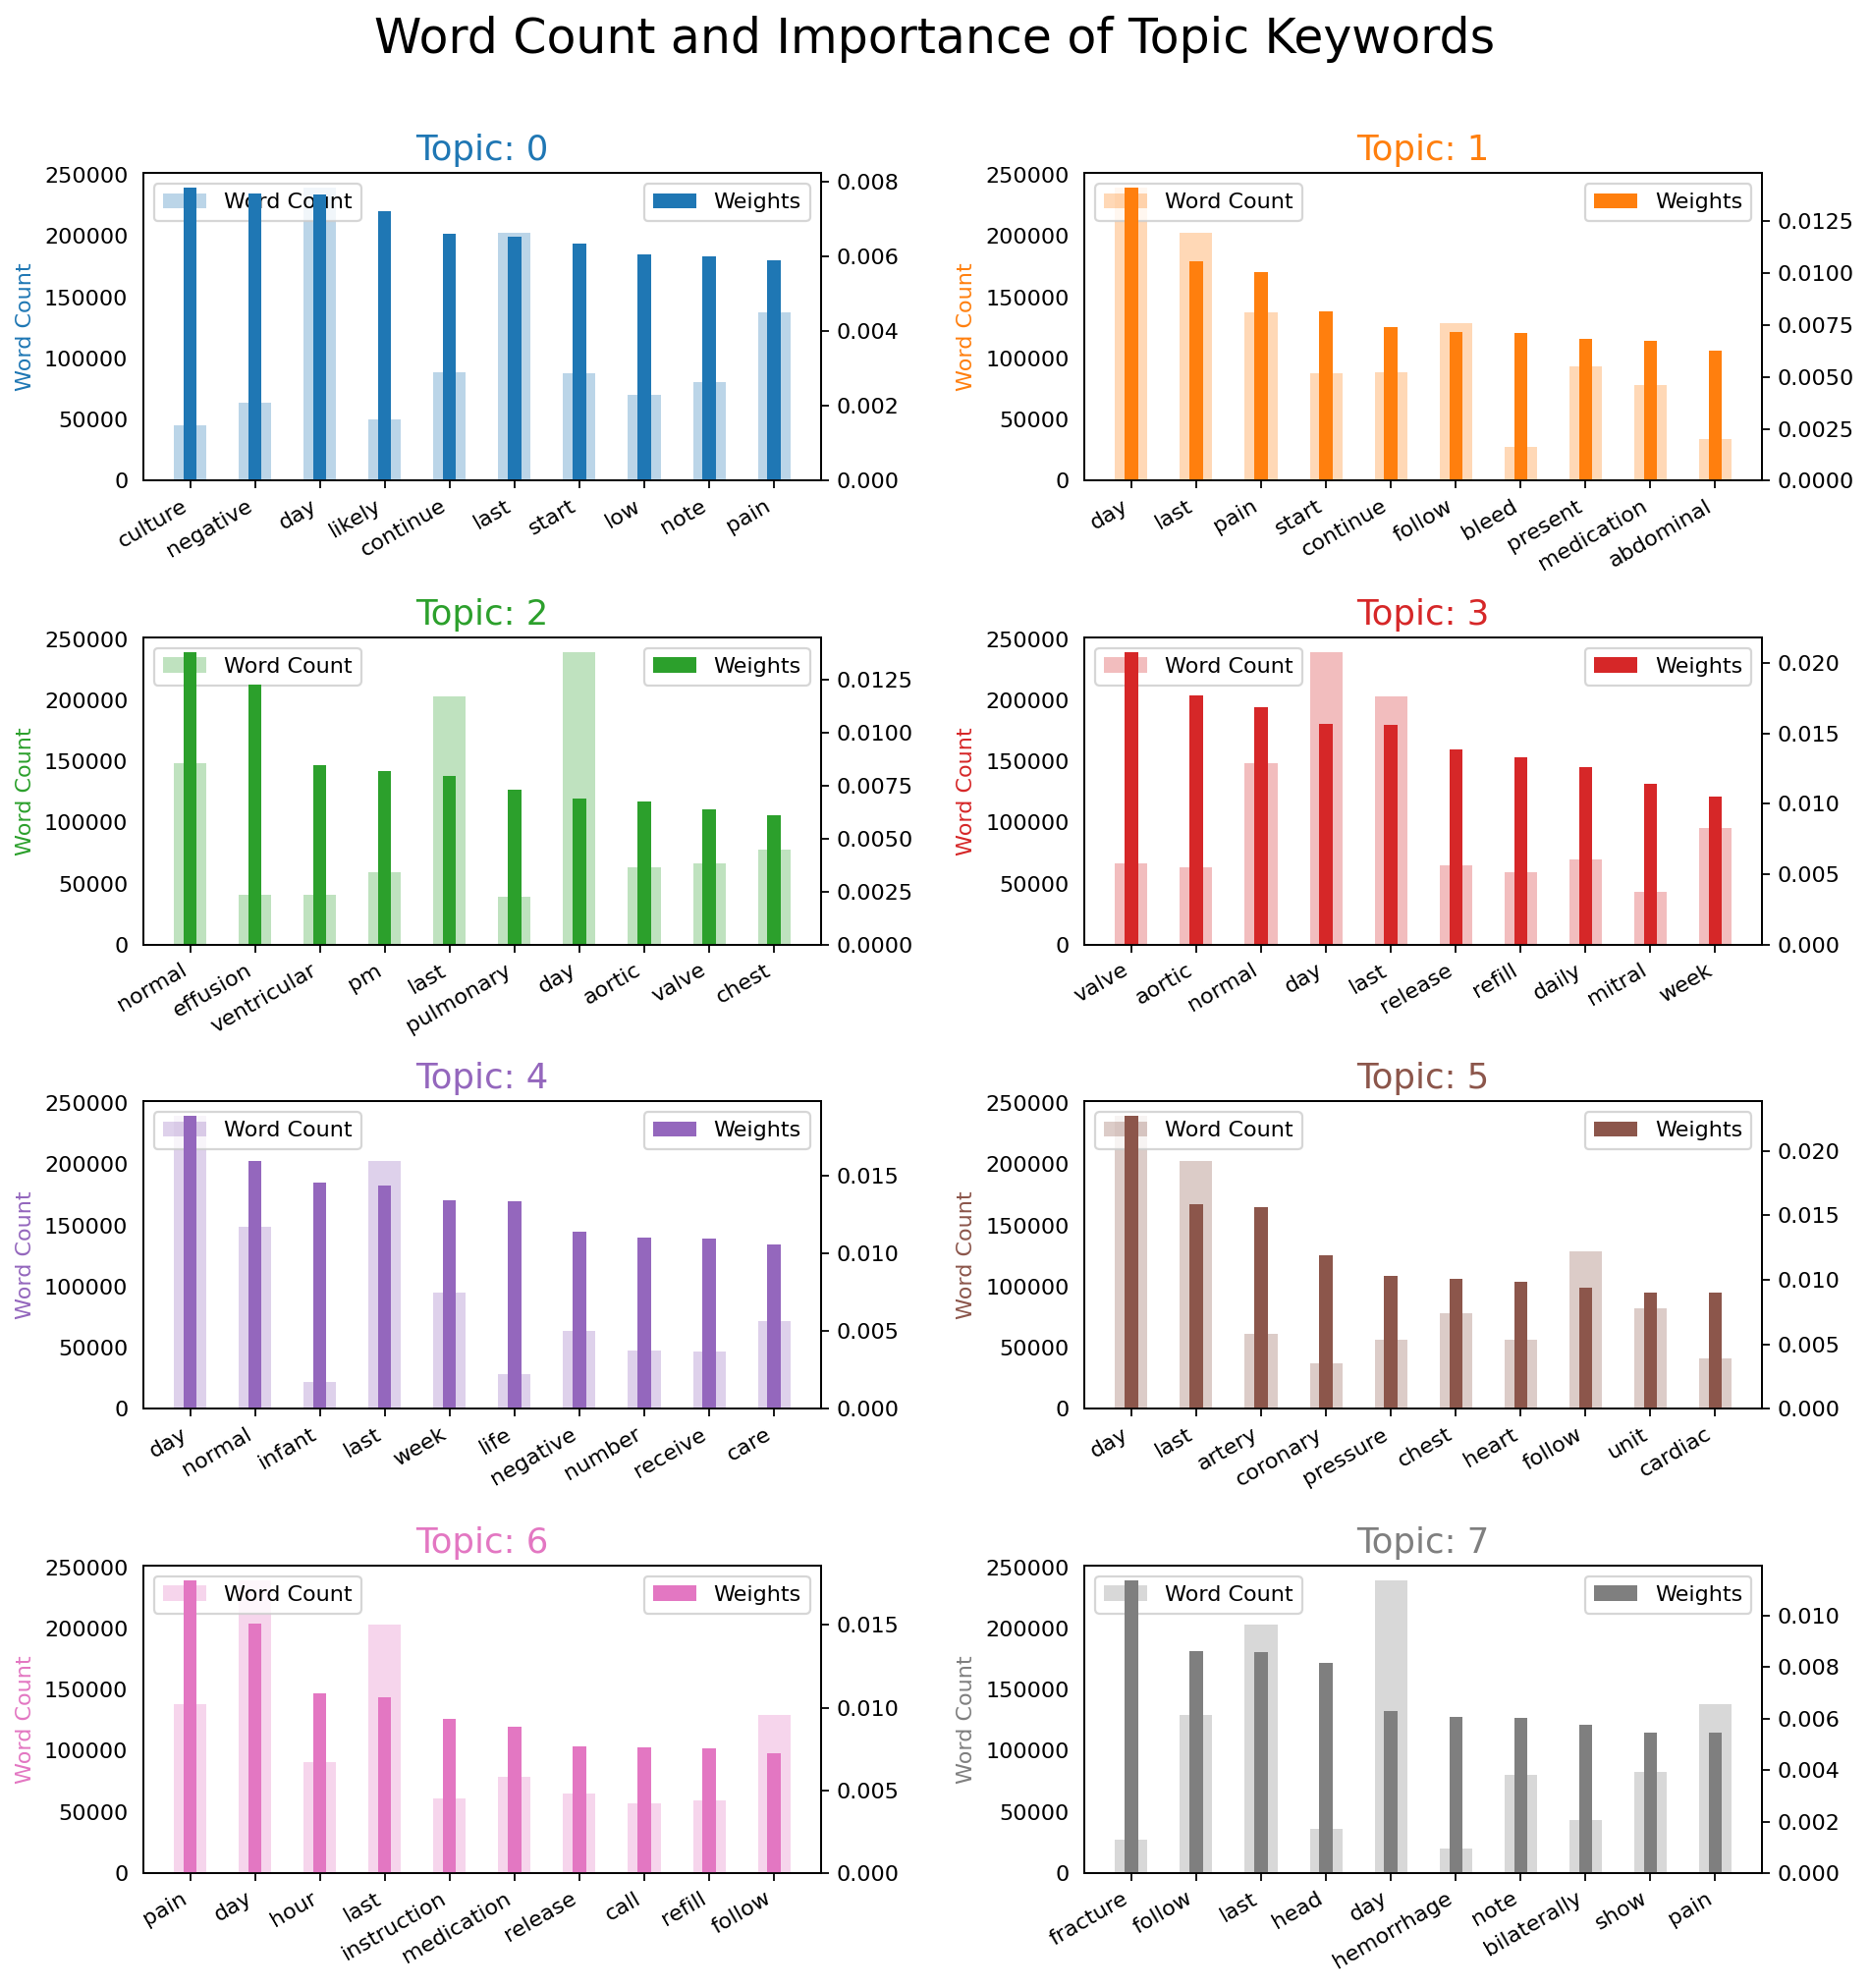

In [ ]:
from collections import Counter
topics = ldamodel8.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(12,12), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

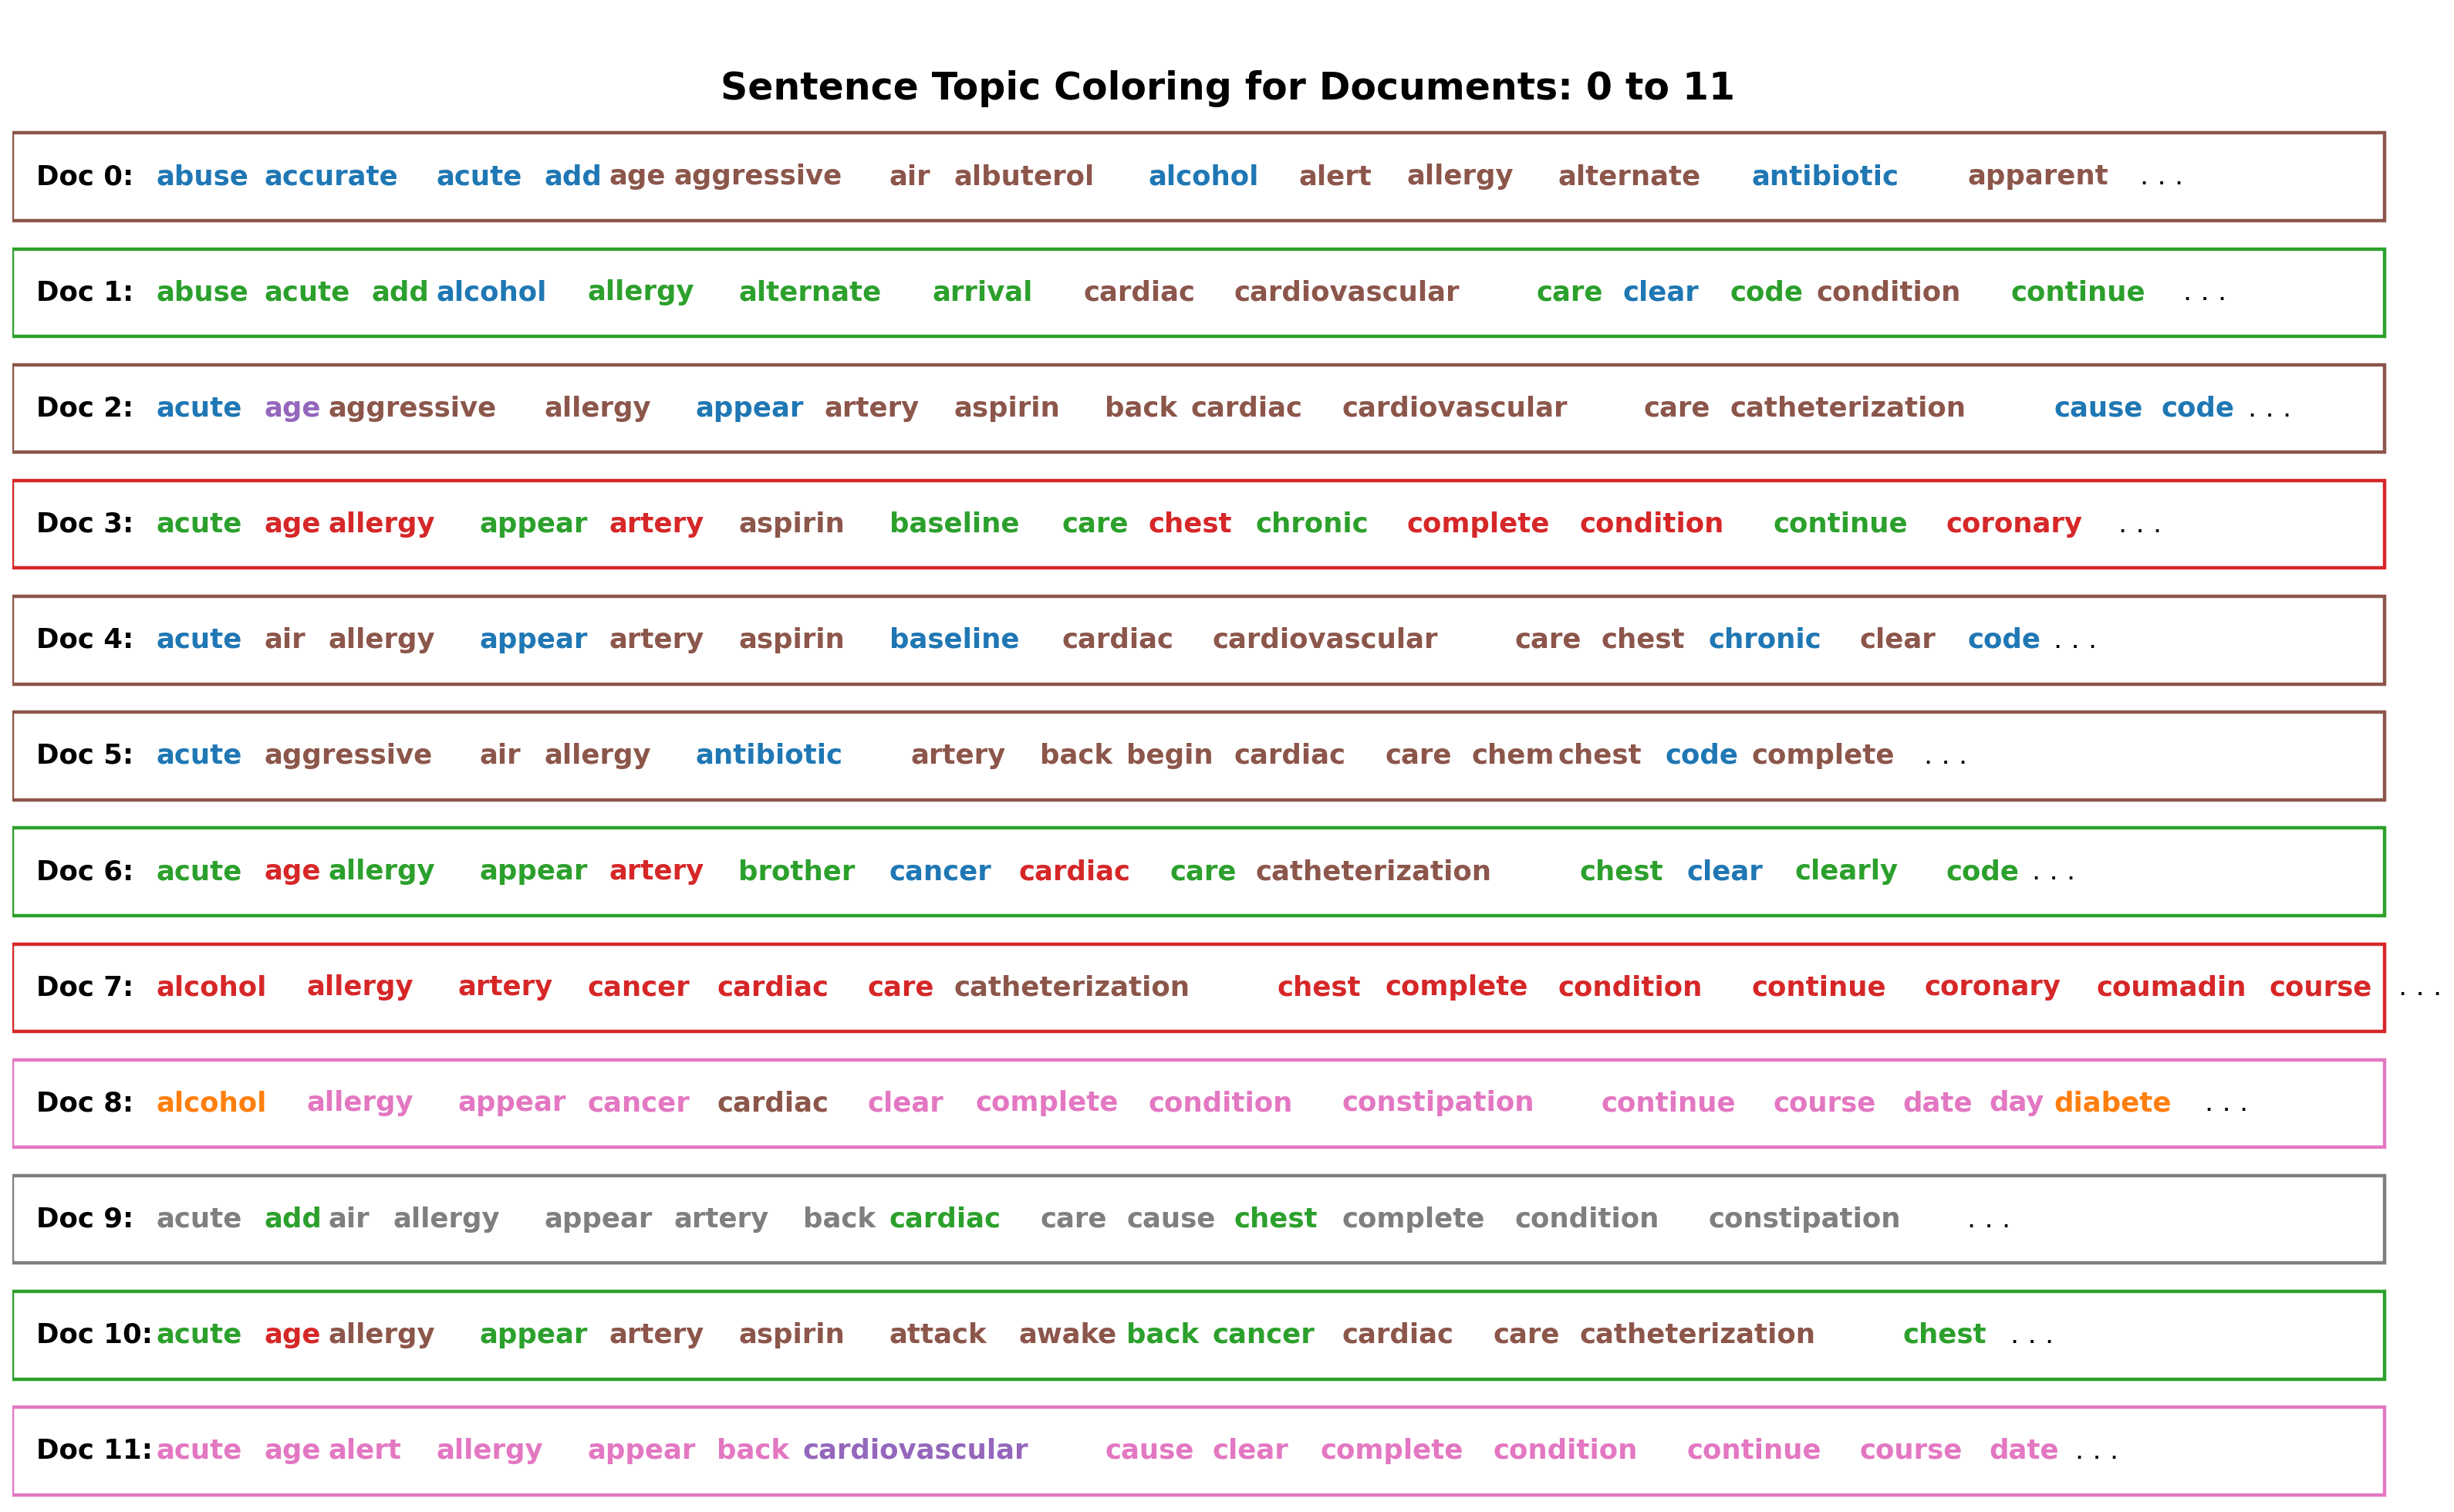

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=ldamodel8, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel8, corpus=corpus, end=-1)            
print("dominant topics:", dominant_topics)
print("topic percentages:", topic_percentages[:5])
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
print("df;", df)
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
print("dominant topic in each doc:", dominant_topic_in_each_doc)
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
print("df dominant topic in each doc:", df_dominant_topic_in_each_doc)

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
print("topic weightage by doc:", topic_weightage_by_doc)
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
print("df topic weightage by doc:", df_topic_weightage_by_doc)

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel8.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]
print("topic top 3 words:", topic_top3words)
df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
print(df_top3words_stacked)
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
print(df_top3words)
df_top3words.reset_index(level=0,inplace=True)
print(df_top3words)

dominant topics: [(0, 5), (1, 2), (2, 5), (3, 3), (4, 5), (5, 5), (6, 2), (7, 3), (8, 6), (9, 7), (10, 3), (11, 6), (12, 5), (13, 0), (14, 0), (15, 3), (16, 7), (17, 1), (18, 1), (19, 7), (20, 5), (21, 6), (22, 4), (23, 4), (24, 6), (25, 4), (26, 2), (27, 2), (28, 4), (29, 6), (30, 7), (31, 3), (32, 0), (33, 1), (34, 2), (35, 0), (36, 6), (37, 0), (38, 1), (39, 4), (40, 2), (41, 3), (42, 5), (43, 5), (44, 5), (45, 5), (46, 7), (47, 0), (48, 5), (49, 5), (50, 7), (51, 4), (52, 5), (53, 1), (54, 1), (55, 0), (56, 7), (57, 1), (58, 4), (59, 4), (60, 0), (61, 3), (62, 3), (63, 1), (64, 2), (65, 3), (66, 3), (67, 6), (68, 6), (69, 0), (70, 7), (71, 1), (72, 0), (73, 2), (74, 0), (75, 7), (76, 0), (77, 7), (78, 6), (79, 5), (80, 5), (81, 1), (82, 7), (83, 1), (84, 0), (85, 0), (86, 4), (87, 5), (88, 7), (89, 4), (90, 6), (91, 4), (92, 0), (93, 5), (94, 5), (95, 3), (96, 0), (97, 3), (98, 1), (99, 0), (100, 6), (101, 6), (102, 0), (103, 2), (104, 7), (105, 5), (106, 6), (107, 3), (108, 6), (1

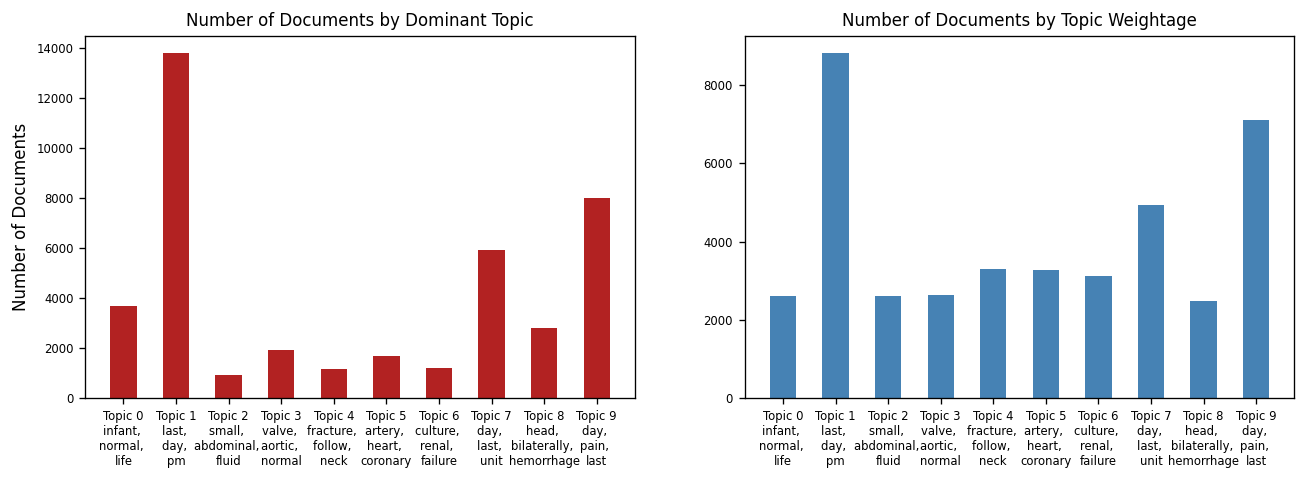

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), dpi=120)


plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')


# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)

ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
corpus

In [ ]:
ldamodel8[corpus]

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
print("Print LDA model corpus:", ldamodel8[corpus])
for i, row_list in enumerate(ldamodel8[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

print("topic weights:", topic_weights)
print(len(topic_weights[0]))
print(len(topic_weights))


Print LDA model corpus: <gensim.interfaces.TransformedCorpus object at 0x7fbb04b60950>
topic weights: [[0.32319483, 0.042667363, 0.047705233, 0.033513762, 0.539607], [0.20078051, 0.05134492, 0.44418177, 0.05624319, 0.022867823, 0.13644399, 0.020189457, 0.067948334], [0.24686071, 0.06779518, 0.14317405, 0.02071608, 0.03617508, 0.4717335], [0.053698845, 0.14860134, 0.3097619, 0.32795697, 0.10643475, 0.044574995], [0.24062742, 0.1647939, 0.03177624, 0.09435599, 0.44924116, 0.011258331], [0.22660084, 0.15411545, 0.077993155, 0.06058415, 0.46384114, 0.01130704], [0.254694, 0.061061773, 0.34709638, 0.23090619, 0.010780598, 0.037745576, 0.014717822, 0.042997655], [0.012278013, 0.65150696, 0.18133943, 0.15303555], [0.060322337, 0.21261251, 0.06858412, 0.020139175, 0.07968536, 0.54551417], [0.020691281, 0.011010962, 0.2587324, 0.06130776, 0.011237203, 0.067412436, 0.56662697], [0.03311934, 0.08084259, 0.33616146, 0.27127194, 0.19587047, 0.047201242, 0.030547477], [0.012325359, 0.04327358, 0.068

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
print(arr.shape)
print("Array of topic weights:", arr)
# Keep the well separated points (optional)

arr = arr[np.amax(arr, axis=1) > 0.35]
print(arr.shape)
# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)
print("topic num:", topic_num)


(41127, 8)
Array of topic weights: [[0.32319483 0.04266736 0.04770523 ... 0.         0.         0.        ]
 [0.20078051 0.05134492 0.44418177 ... 0.13644399 0.02018946 0.06794833]
 [0.24686071 0.06779518 0.14317405 ... 0.47173351 0.         0.        ]
 ...
 [0.35629427 0.07671954 0.05961752 ... 0.35618842 0.04125792 0.02252432]
 [0.33102199 0.32658038 0.15656801 ... 0.01119684 0.1186162  0.02362221]
 [0.05485589 0.02730777 0.01252751 ... 0.55513537 0.         0.        ]]
(35532, 8)
topic num: [4 2 5 ... 2 0 5]


For each document topic weight for each topic in that documents is calculated by the LDA model. I got the N*k dimension array after filling with nan topic weight with 0. I found the dominant topic in each document using the max topic weight and stored the topic number. When I plotted the TSNE plot I was getting clusters but the custers where not well seperated so I started to remove the documents with topic weight very less because they will not be contributing much to the topics. After trying multiple values, 0.35 was a good threshold for topic weights for documents fo I remove those documents and left with 40593 document with k topic weights each. My final array for D_new*K which I plotted using TSNE. TSNE reduced the 8 dimensional vector for each document and displayed it in 2D with the dominant topic number as the color for each document.

In [ ]:
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35532 samples in 0.057s...
[t-SNE] Computed neighbors for 35532 samples in 2.659s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35532
[t-SNE] Computed conditional probabilities for sample 2000 / 35532
[t-SNE] Computed conditional probabilities for sample 3000 / 35532
[t-SNE] Computed conditional probabilities for sample 4000 / 35532
[t-SNE] Computed conditional probabilities for sample 5000 / 35532
[t-SNE] Computed conditional probabilities for sample 6000 / 35532
[t-SNE] Computed conditional probabilities for sample 7000 / 35532
[t-SNE] Computed conditional probabilities for sample 8000 / 35532
[t-SNE] Computed conditional probabilities for sample 9000 / 35532
[t-SNE] Computed conditional probabilities for sample 10000 / 35532
[t-SNE] Computed conditional probabilities for sample 11000 / 35532
[t-SNE] Computed conditional probabilities for sample 12000 / 35532
[t-SNE] Computed conditional probabilities for sam

In [ ]:
!python -m pip install -U pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis